In [1]:
from funcions_finals.matricula_to_digits_2 import matricula_to_digits
from funcions_finals.digits_to_predicts_3 import predict_digits, CNNModel_a, CNNModel_n
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from ultralytics import YOLO


## FALTA:

## acabar YOLO:
### - EMPALMAR MODEL YOLO
### - VALIDAR YOLO (1)

## detectar errors img classif
### - CREAR METRICA VALID
### - VALIDAR IMG CLASSIF (2)
### - CROSS VALIDATION
### - TEST HIP FINAL

## solució errors
### - PROVAR NOUS MODELS
### - CANVIAR DISTRIBUCIÓ DATASET

## 1. IMATGE -> MATRICULA

In [2]:
from funcions_finals.matricula_to_digits_2 import matricula_to_digits

image_path = 'img_exemple\matricula_exemple.jpg'

crop_matricula = matricula_to_digits(image_path)

In [7]:
print(len(crop_matricula))

11


## 2. MATRICULA -> DIGITS

- input: cv2 image
- output: list dels digits cv2 image

In [3]:
digits = matricula_to_digits(crop_matricula)

num_digits = digits[0:4]
alfa_digits = digits[4:7]

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


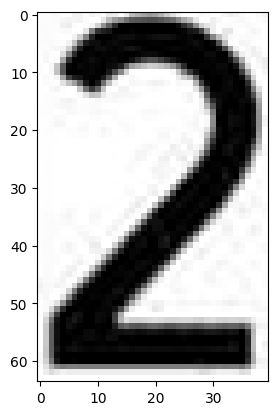

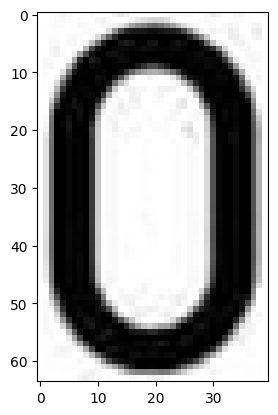

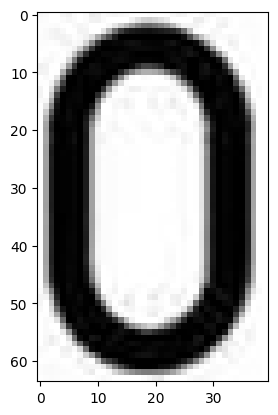

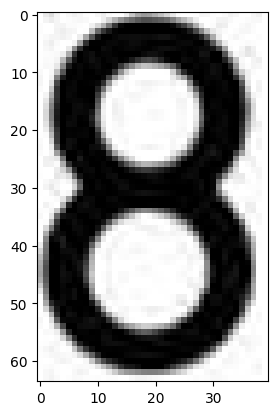

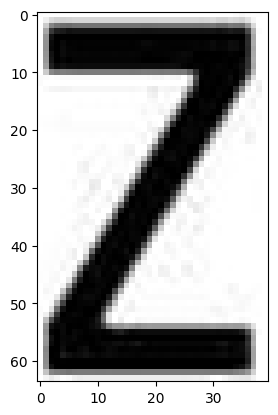

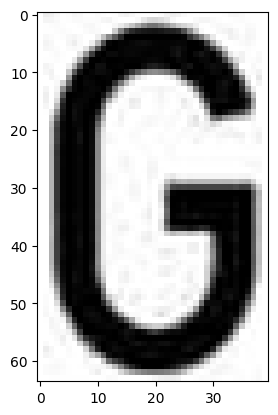

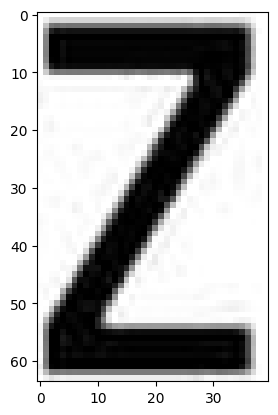

In [4]:
for d in digits:
    plt.figure()
    plt.imshow(cv2.cvtColor(d, cv2.COLOR_BGR2RGB))

## 3. DIGITS -> PREDICT

In [5]:
# Inicializar los modelos
model_alfa = CNNModel_a()
model_num = CNNModel_n()

# Cargar los estados de los modelos
model_alfa.load_state_dict(torch.load("models/CNN1-alfa.pt"))
model_num.load_state_dict(torch.load("models/CNN1-numeros.pt"))

# Cambiar a modo de evaluación
model_alfa.eval()
model_num.eval()

C:\Users\mirvi\AppData\Local\Temp\ipykernel_15240\1348125345.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_alfa.load_state_dict(torch.load("models/CNN1-alfa.pt")

CNNModel_n(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=5120, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [6]:
num_preds, alfa_preds = predict_digits(num_digits, alfa_digits,model_num,model_alfa)

[2, 0, 0, 8] ['Z', 'G', 'Z']


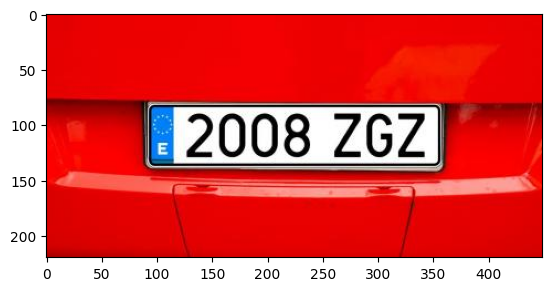

In [7]:
# show original image
plt.figure()
plt.imshow(cv2.cvtColor(img_exemple, cv2.COLOR_BGR2RGB))

# show predicted digits
print(num_preds, alfa_preds)